## Importing the necessary libraries/modules.

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#   Ignoring any FutureWarning messages.

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

The first part of this project is to establish a connection with the SQLite database, which can be conveniently done through the sqlite3.connect function. Once the connection has been established, the next step is to create an sqlite3.Cursor instance to execute SQL statements and fetch results from SQL queries.

In [3]:
connection=sqlite3.connect("C:\\Users\\ejjid\\Downloads\\database.sqlite\\database.sqlite")   #   Establishing a connection with the database.
cursor=connection.cursor()  #   Creating a cursor object to execute queries.

As can be seen in the result, the pandas.read_sql_query is successfully able to store the first ten rows of the Match table into a pandas.DataFrame through the corresponding SQL query, which means that the database can be analysed further.

##  Match_Table

In [4]:
dataframe=pd.read_sql_query('''SELECT *
                                FROM Match
                                LIMIT 10;''', connection)
dataframe

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,GBH,GBD,GBA,BSH,BSD,BSA,Leagues,Countries,Home_Team,Away_Team
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.78,3.25,4.00,1.73,3.40,4.20,Belgium Jupiler League,Belgium,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,1.85,3.25,3.75,1.91,3.25,3.60,Belgium Jupiler League,Belgium,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,3.20,2.50,2.30,3.20,2.75,Belgium Jupiler League,Belgium,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,1.50,3.75,5.50,1.44,3.75,6.50,Belgium Jupiler League,Belgium,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,4.50,3.50,1.65,4.75,3.30,1.67,Belgium Jupiler League,Belgium,FCV Dender EH,Standard de Liège
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,4.50,3.40,1.70,NaN,NaN,NaN,Belgium Jupiler League,Belgium,KV Mechelen,Club Brugge KV
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,1.85,3.25,3.75,2.10,3.25,3.10,Belgium Jupiler League,Belgium,KSV Roeselare,KV Kortrijk
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.80,3.20,2.25,2.88,3.25,2.20,Belgium Jupiler League,Belgium,Tubize,Royal Excel Mouscron
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,2.20,3.30,2.80,2.25,3.20,2.80,Belgium Jupiler League,Belgium,KVC Westerlo,Sporting Charleroi
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,1.25,5.00,10.00,1.29,4.50,9.00,Belgium Jupiler League,Belgium,Club Brugge KV,KV Kortrijk


In [5]:
print("Columns of the DataFrame:", dataframe.columns.tolist())

Columns of the DataFrame: ['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'hom

## Extracting the distinct values of the columns containing the names corresponding to the tables.

In [7]:
#   Extracting the distinct values of the columns containing the names corresponding to the tables.

countries=cursor.execute('''SELECT COUNT(DISTINCT name)
                                FROM League;''').fetchall()
leagues=cursor.execute('''SELECT COUNT(DISTINCT name)
                            FROM League;''').fetchall()
teams=cursor.execute('''SELECT COUNT(DISTINCT team_long_name)
                            FROM Team;''').fetchall()
players=cursor.execute('''SELECT COUNT(DISTINCT player_name)
                            FROM Player;''').fetchall()

#   Printing the count of each table.

print("Countries: ", countries[0][0])
print("Leagues: ", leagues[0][0])
print("Teams: ", teams[0][0])
print("Players: ", players[0][0])

Countries:  11
Leagues:  11
Teams:  296
Players:  10848


## Processing the Database into the Required Format:

In [8]:
dataframe=pd.read_sql_query('''SELECT *
                                FROM Match
                                    LIMIT 10;''', connection)
dataframe

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,GBH,GBD,GBA,BSH,BSD,BSA,Leagues,Countries,Home_Team,Away_Team
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.78,3.25,4.00,1.73,3.40,4.20,Belgium Jupiler League,Belgium,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,1.85,3.25,3.75,1.91,3.25,3.60,Belgium Jupiler League,Belgium,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,3.20,2.50,2.30,3.20,2.75,Belgium Jupiler League,Belgium,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,1.50,3.75,5.50,1.44,3.75,6.50,Belgium Jupiler League,Belgium,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,4.50,3.50,1.65,4.75,3.30,1.67,Belgium Jupiler League,Belgium,FCV Dender EH,Standard de Liège
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,4.50,3.40,1.70,NaN,NaN,NaN,Belgium Jupiler League,Belgium,KV Mechelen,Club Brugge KV
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,1.85,3.25,3.75,2.10,3.25,3.10,Belgium Jupiler League,Belgium,KSV Roeselare,KV Kortrijk
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.80,3.20,2.25,2.88,3.25,2.20,Belgium Jupiler League,Belgium,Tubize,Royal Excel Mouscron
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,2.20,3.30,2.80,2.25,3.20,2.80,Belgium Jupiler League,Belgium,KVC Westerlo,Sporting Charleroi
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,1.25,5.00,10.00,1.29,4.50,9.00,Belgium Jupiler League,Belgium,Club Brugge KV,KV Kortrijk


1. What was the win percentage, and the aggregated number of wins, losses, goals scored, and goals conceded for each team in each season across each league that they're associated with?


The SQL query written to fetch the result and calculate the necessary statistics is performing several operations on the Match table to retrieve specific information.

Using two SELECT statements to select the Home_Team, Away_Team, season, Leagues, home_team_goal, and away_team_goal columns from the Match table.
Using the GROUP BY and DESC clause to group the database by the Team, season, and Leagues columns, which groups the database by the team, season and league.
Using the COUNT function to count the number of matches played by each team in each season.
Using the SUM function to calculate the total number of goals scored and goals conceded by each team in each season.
Using the CASE statement with the SUM function to calculate the number of wins, draws, and losses for each team in each season.
Using the SUM function with a division by the COUNT function to calculate the win percentage for each team in each season.
Using the UNION operator to combine both the result of the home teams and away teams.
Using the ORDER BY and DESC clause to order the result by the win percentage in descending order.

In [9]:
dataframe=pd.read_sql_query('''SELECT Home_Team AS "Team",
                                season AS "Season",
                                Leagues AS "League",
                                COUNT(*) AS "Matches_Played",
                                SUM(home_team_goal) AS "Goals_Scored",
                                SUM(away_team_goal) AS "Goals_Conceded",
                                SUM(
                                    CASE WHEN home_team_goal>away_team_goal
                                    THEN 1
                                    ELSE 0
                                    END) AS "Wins",
                                SUM(
                                        CASE WHEN home_team_goal=away_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Draws",
                                SUM(
                                        CASE WHEN home_team_goal<away_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Losses",
                                SUM(
                                        CASE WHEN home_team_goal>away_team_goal
                                        THEN 1
                                        ELSE 0
                                        END)*100/COUNT(*) AS "Win_Percentage"
                                FROM Match
                                GROUP BY Team, season, Leagues
                                UNION
                                SELECT Away_Team AS "Team",
                                season AS "Season",
                                Leagues AS "League",
                                COUNT(*) AS "Matches_Played",
                                SUM(away_team_goal) AS "Goals_Scored",
                                SUM(home_team_goal) AS "Goals_Conceded",
                                SUM(
                                        CASE WHEN away_team_goal>home_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Wins",
                                SUM(
                                        CASE WHEN away_team_goal=home_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Draws",
                                SUM(
                                        CASE WHEN away_team_goal<home_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Losses",
                                SUM(
                                        CASE WHEN away_team_goal>home_team_goal
                                        THEN 1
                                        ELSE 0
                                        END)*100/COUNT() AS "Win_Percentage"
                                FROM Match
                                GROUP BY Team, season, Leagues
                                ORDER BY Win_Percentage
                                DESC;''', connection)
dataframe

,Team,Season,League,Matches_Played,Goals_Scored,Goals_Conceded,Wins,Draws,Losses,Win_Percentage
0,Juventus,2013/2014,Italy Serie A,19,47,9,19,0,0,100
1,KV Oostende,2013/2014,Belgium Jupiler League,3,4,0,3,0,0,100
2,Ajax,2009/2010,Netherlands Eredivisie,17,64,4,16,1,0,94
3,FC Barcelona,2009/2010,Spain LIGA BBVA,19,57,11,18,1,0,94
4,FC Barcelona,2012/2013,Spain LIGA BBVA,19,63,15,18,1,0,94
...,...,...,...,...,...,...,...,...,...,...
2951,Valenciennes FC,2008/2009,France Ligue 1,19,8,24,0,10,9,0
2952,Waasland-Beveren,2013/2014,Belgium Jupiler League,3,3,6,0,1,2,0
2953,Widzew Łódź,2013/2014,Poland Ekstraklasa,15,8,33,0,1,14,0
2954,Willem II,2010/2011,Netherlands Eredivisie,17,9,50,0,3,14,0


From the resulting pandas.DataFrame, the number of matches played, goals scored, goals conceded, wins, draws, losses and win percentage for each team in each season and league can be seen. For instance, the result shows that Juventus F.C. had the highest win percentage in Italy Serie A during the 2013/2014 season, which was exactly the case (https://en.wikipedia.org/wiki/2013%E2%80%9314_Serie_A), so the result seems accurate.

2. Which were the top ten teams with the most wins across all seasons and leagues during the entire duration?

                Once the database had been analysed and the aggregated information has successfully been fetched into a significantly smaller pandas.DataFrame, it only makes sense to create some foundational visualisations, such as finding the top ten teams with the most wins across all seasons and leagues during the entire duration.

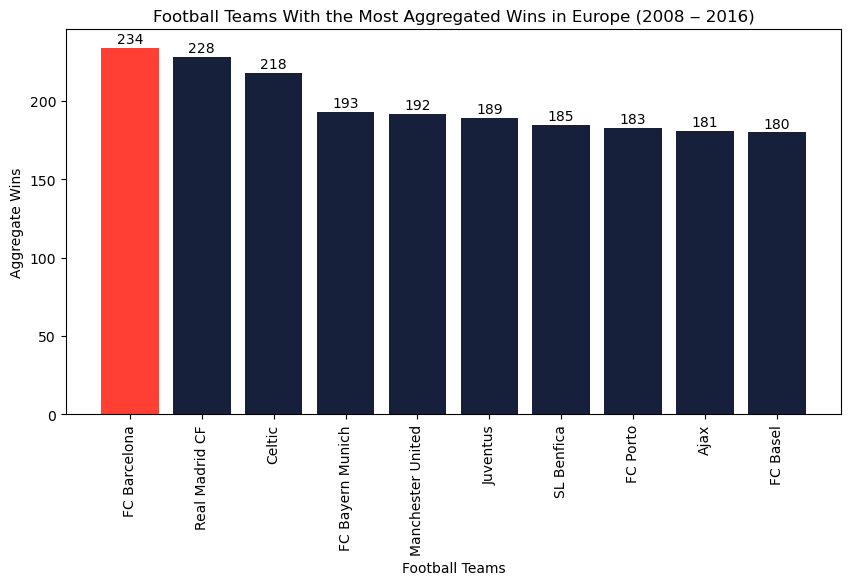

In [10]:
wins=dataframe.groupby(["Team"])["Wins"].sum().reset_index()  #   Grouping the pandas.DataFrame by team and league, and summing the wins.
wins=wins.sort_values(by="Wins", ascending=False).reset_index(drop=True)    #   Sorting the pandas.DataFrame by the wins in descending order.

#   Plotting a bar graph for the top ten teams with the most wins across all seasons and leagues.

plt.figure(figsize=(10, 5))
plt.bar(wins["Team"][:10], wins["Wins"][:10], color="#17203b")
plt.bar(wins["Team"][0], wins["Wins"][0], color="#ff3f34")
plt.xticks(rotation=90)
plt.xlabel("Football Teams")
plt.ylabel("Aggregate Wins")
plt.title("Football Teams With the Most Aggregated Wins in Europe (2008 ‒ 2016)")
for i in range(10):
    plt.text(x=i, y=wins["Wins"][i]+3, s=wins["Wins"][i], ha="center")
plt.show()

From the visualised bar chart, it's clear that FC Barcelona had the most wins (234 wins) across all seasons and leagues during the entire duration, followed by Real Madrid CF (228 wins) and Celtic FC (218 wins).

Additionally, there's also a Team_Attributes table in the database, which contains attributes about each team corresponding to their foreign keys. Like with the Match table, the first thought that comes to mind when coming across this table is to join the attributes of each team with their corresponding names based on the corresponding foreign keys in the Team table. Since the Team_Attributes table is relatively small, I've stored it in a pandas.DataFrame for further analysis.

## Team_Attributes Table  

In [11]:
#   Creating a pandas.DataFrame from the table.

team_attributes=pd.read_sql_query('''SELECT *
                                        FROM Team_Attributes''', connection)
team_attributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Team
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,Normal,Organised,46,Medium,48,Press,53,Normal,Cover,SV Zulte-Waregem
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,Normal,Organised,44,Medium,55,Press,53,Normal,Cover,SV Zulte-Waregem
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem


In [12]:
# Assuming team_attributes and dataframe are your original DataFrames
numeric_columns = team_attributes.select_dtypes(include=['int64', 'float64'])
numeric_columns['Team'] = team_attributes['Team']
numeric_columns = numeric_columns.dropna()
team_attributes_mean = numeric_columns.groupby("Team").mean().reset_index()

goals_scored = dataframe.groupby(["Team", "League"])["Goals_Scored"].sum().reset_index()
goals_scored = goals_scored.sort_values(by="Goals_Scored", ascending=False).reset_index(drop=True)

team_attributes_goals = pd.merge(team_attributes_mean, goals_scored, on="Team")
team_attributes_goals = team_attributes_goals.sort_values(by="Goals_Scored", ascending=False).reset_index(drop=True)
team_attributes_goals = team_attributes_goals.drop(["id", "team_fifa_api_id", "team_api_id", "League"], axis=1)
team_attributes_goals

,Team,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,Goals_Scored
0,FC Barcelona,35.5,35.0,41.5,36.5,40.0,45.5,61.0,64.0,65.0,849
1,Real Madrid CF,50.0,55.5,43.5,64.5,47.5,66.0,45.5,54.5,64.0,843
2,Celtic,62.0,50.5,55.5,53.0,56.0,62.0,54.5,54.5,58.0,695
3,FC Bayern Munich,41.0,29.0,25.0,29.0,34.5,31.0,66.5,56.0,49.5,653
4,PSV,67.0,39.0,41.5,53.0,48.5,41.5,45.0,51.0,51.5,652
...,...,...,...,...,...,...,...,...,...,...,...
255,Pescara,64.0,41.5,44.5,46.0,56.5,47.5,32.5,46.0,45.5,27
256,SpVgg Greuther Fürth,60.0,60.0,45.5,55.0,44.5,49.0,48.5,52.0,64.0,26
257,FC Dordrecht,39.0,33.0,62.0,62.0,66.0,48.0,51.0,58.0,55.0,24
258,Córdoba CF,46.5,46.5,50.5,47.5,62.5,52.5,37.0,40.0,52.0,22


In [13]:
print("Columns of the team_attributes DataFrame:", team_attributes.columns)

Columns of the team_attributes DataFrame: Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass',
       'Team'],
      dtype='object')


3.  Which (did) team attributes played a major part in determining the performance (aggregated goals scored) of the teams?

        I've visualised a chart to find a correlation (if any) between the team attributes and the aggregated goals scored by the teams to see which team attributes played a major part in determining the performance of the teams.

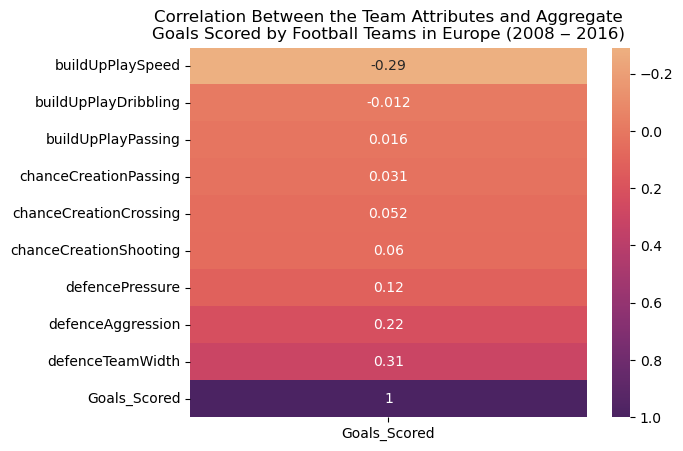

In [14]:
# Drop the "Team" column before calculating the correlation
correlation_df = team_attributes_goals.drop("Team", axis=1)

# Calculate the correlation
correlation = correlation_df.corr()

# Plot the heatmap
sns.heatmap(correlation[["Goals_Scored"]].sort_values(by="Goals_Scored", ascending=True), annot=True, cmap="flare", yticklabels=correlation.index)
plt.title('''Correlation Between the Team Attributes and Aggregate
Goals Scored by Football Teams in Europe (2008 ‒ 2016)''')
plt.gcf().axes[1].invert_yaxis() # Invert y-axis to display the highest correlation at the top
plt.show()


Based on the visualised heat map chart, it can be seen that defence pressure, when one or more defenders closely mark a ball carrier to pester them into losing the ball, had the strongest positive linear realtionship with the performance (aggregated goals scored) of the teams. Likewise, build-up play passing, working on quick play and sharp movement to create space and to improve in a game situation, had the strongest negative relationship. Hence, I've taken the team attribute with the strongest positive linear realtionship (defence pressure) and the team attribute with the strongest negative linear realtionship (build-up play passing), and visualised them individually to find the correlation they had with the performance (aggregated goals scored) of the teams.

C:\Users\ejjid\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


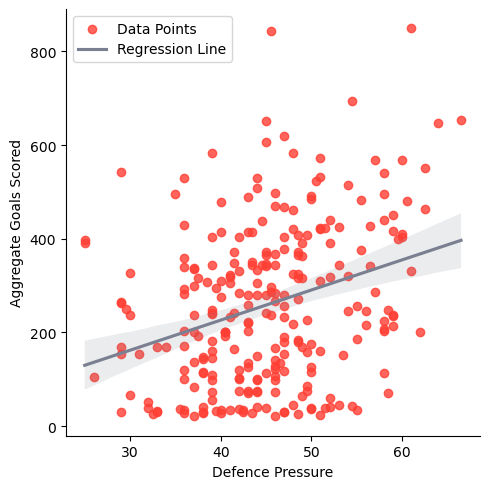

C:\Users\ejjid\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


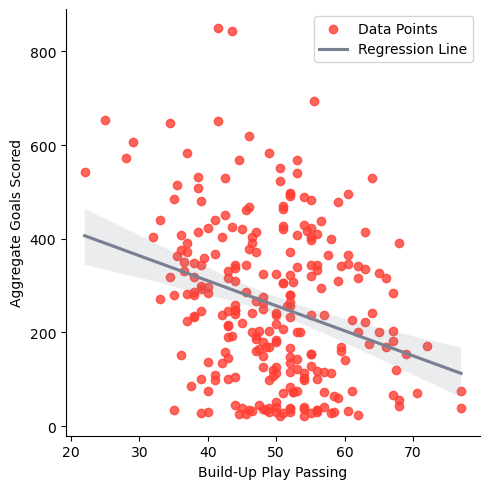

In [15]:
#   Plotting a scatter plot with the regression line for the correlation between the defence pressure and the aggregated goals scored by the teams.

sns.lmplot(x="defencePressure", y="Goals_Scored", data=team_attributes_goals, scatter_kws={"color": "#ff3f34"}, line_kws={"color": "#7a8092"})
plt.xlabel("Defence Pressure")
plt.ylabel("Aggregate Goals Scored")
plt.legend(["Data Points", "Regression Line"])
plt.show()

#   Plotting a scatter plot with the regression line for the correlation between the build-up play passing and the aggregated goals scored by the teams.

sns.lmplot(x="buildUpPlayPassing", y="Goals_Scored", data=team_attributes_goals, scatter_kws={"color": "#ff3f34"}, line_kws={"color": "#7a8092"})
plt.xlabel("Build-Up Play Passing")
plt.ylabel("Aggregate Goals Scored")
plt.legend(["Data Points", "Regression Line"])
plt.show()

4.  How did the aggregated goals scored for the top five highest-scoring teams in a specific league (Italy Serie A) change over the seasons?



            One important detail that can be visualised from the information about the performance of all the teams is the change in how they performed over the entire (or a specific) duration. Since there is information about nearly 300 teams in the database, it wouldn't be practical to visualise all of their performance changes, so I've only visualised the change in the performance of the top five highest-scoring teams over the seasons in a specific league, Italy Serie A. As a measure of performance, I've, once again, used the aggregated goals scored by each team in each season in the league.

            Firstly, I've found the top five highest-scoring teams in Italy Serie A, which are seemingly Juventus, AS Roma FC, S.S.C. Napoli, A.C. Milan, and Inter Milan, by filtering the pandas.DataFrame according to the teams associated with the specific league and sorting their aggregated goals scored across all seasons in descending order.

In [16]:
italy_serie_a=dataframe[dataframe["League"]=="Italy Serie A"].groupby(["Team", "Season"])["Goals_Scored"].sum().reset_index()   #   Grouping the pandas.DataFrame by the teams and seasons in a specific league, and aggregating the goals scored.
italy_serie_a=italy_serie_a.sort_values(by="Goals_Scored", ascending=False).reset_index(drop=True)  #   Sorting the pandas.DataFrame by the aggregated goals scored in descending order.
italy_serie_a_goals=italy_serie_a.groupby("Team")["Goals_Scored"].sum().reset_index()   #   Grouping the pandas.DataFrame by the teams, and aggregating the goals scored.
italy_serie_a_goals=italy_serie_a_goals.sort_values(by="Goals_Scored", ascending=False).reset_index(drop=True)  #   Sorting the pandas.DataFrame by the aggregated goals scored in descending order.
italy_serie_a_goals.head(5)

,Team,Goals_Scored
0,Juventus,543
1,Roma,530
2,Napoli,514
3,Milan,496
4,Inter,496


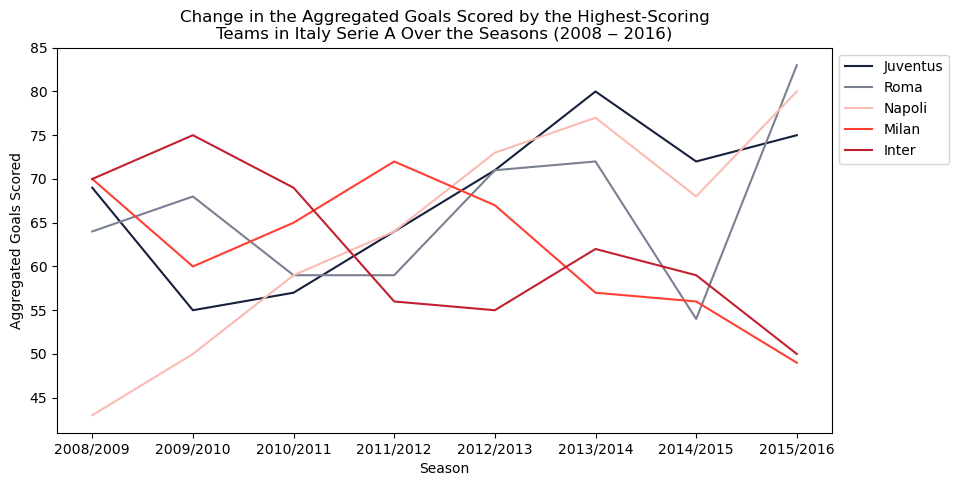

In [17]:
#   Sorting the pandas.DataFrame according to the season in ascending order for each team, and storing them in separate pandas.DataFrames for each team.

juventus=(italy_serie_a[italy_serie_a["Team"]=="Juventus"]).sort_values(by="Season").reset_index(drop=True)
roma=(italy_serie_a[italy_serie_a["Team"]=="Roma"]).sort_values(by="Season").reset_index(drop=True)
napoli=(italy_serie_a[italy_serie_a["Team"]=="Napoli"]).sort_values(by="Season").reset_index(drop=True)
milan=(italy_serie_a[italy_serie_a["Team"]=="Milan"]).sort_values(by="Season").reset_index(drop=True)
inter=(italy_serie_a[italy_serie_a["Team"]=="Inter"]).sort_values(by="Season").reset_index(drop=True)

#   Plotting a line plot for the change in the aggregated goals scored by the top five highest-scoring teams in Italy Serie A over the seasons.

plt.figure(figsize=(10, 5))
plt.plot(juventus["Season"], juventus["Goals_Scored"], color="#17203b", label="Juventus")
plt.plot(roma["Season"], roma["Goals_Scored"], color="#7a8092", label="Roma")
plt.plot(napoli["Season"], napoli["Goals_Scored"], color="#f9bbb3", label="Napoli")
plt.plot(milan["Season"], milan["Goals_Scored"], color="#ff3f34", label="Milan")
plt.plot(inter["Season"], inter["Goals_Scored"], color="#c3202f", label="Inter")
plt.title('''Change in the Aggregated Goals Scored by the Highest-Scoring
Teams in Italy Serie A Over the Seasons (2008 ‒ 2016)''')
plt.xlabel("Season")
plt.ylabel("Aggregated Goals Scored")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

It can be seen that S.S.C. Napoli saw a constant increase in performance (aggregated goals scored) between 2008/2009 and 2013/2014, even surpassing the highest-scoring team, Juventus, at once point, but saw a sudden decrease in the subsequent season, which is also where all the other teams saw a sudden decrease in performance (aggregated goals scored), but while Juventus, AS Roma FC, and S.S.C. Napoli were able to recover, A.C. Milan and Inter Milan showed the opposite. Judging from the performance change of A.C. Milan and Inter Milan, it can be noticed that both teams relatively poorly over the seasons, with a very inconsistent and unforeseen improvement.

# Player_Attributes Table  

In [18]:
player_attributes=pd.read_sql_query('''SELECT *
                                        FROM player_Attributes''', connection)
print("Columns of the player_attributes DataFrame:", player_attributes.columns)

Columns of the player_attributes DataFrame: Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'Player', 'Height', 'Weight'],
      dtype='object')


In [19]:
    player_attributes=pd.read_sql_query('''SELECT Player,
                                            Weight,
                                            Height,
                                            AVG(overall_rating) AS "Overall_Rating", 
                                            AVG(potential) AS "Potential", 
                                            AVG(crossing) AS "Crossing", 
                                            AVG(finishing) AS "Finishing",
                                            AVG(heading_accuracy) AS "Head_Accuracy",
                                            AVG(short_passing) AS "Short_Passing",
                                            AVG(volleys) AS "Volleys",
                                            AVG(dribbling) AS "Dribbling",
                                            AVG(curve) AS "Curve",
                                            AVG(free_kick_accuracy) AS "Free_Kick_Accuracy",
                                            AVG(long_passing) AS "Long_Passing",
                                            AVG(ball_control) AS "Ball_Control",
                                            AVG(acceleration) AS "Acceleration",
                                            AVG(sprint_speed) AS "Sprint_Speed",
                                            AVG(agility) AS "Agility",
                                            AVG(reactions) AS "Reactions",
                                            AVG(balance) AS "Balance",
                                            AVG(shot_power) AS "Short_Power",
                                            AVG(jumping) AS "Jumping",
                                            AVG(stamina) AS "Stamina",
                                            AVG(strength) AS "Strength",
                                            AVG(long_shots) AS "Long_Shots",
                                            AVG(aggression) AS "Aggression",
                                            AVG(interceptions) AS "Interceptions",
                                            AVG(positioning) AS "Positioning",
                                            AVG(vision) AS "Vision",
                                            AVG(penalties) AS "Penalties",
                                            AVG(marking) AS "Marking",
                                            AVG(standing_tackle) AS "Standing_Tackle",
                                            AVG(sliding_tackle) AS "Sliding_Tackle",
                                            AVG(gk_diving) AS "Goalkeeper_Diving",
                                            AVG(gk_handling) AS "Goalkeeper_Handling",
                                            AVG(gk_kicking) AS "Goalkeeper_Kicking",
                                            AVG(gk_positioning) AS "Goalkeeper_Positioning",
                                            AVG(gk_reflexes) AS "Goalkeeper_Reflexes"
                                            FROM Player_Attributes
                                            GROUP BY Player;''', connection)
    player_attributes

,Player,Weight,Height,Overall_Rating,Potential,Crossing,Finishing,Head_Accuracy,Short_Passing,Volleys,...,Vision,Penalties,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,Goalkeeper_Kicking,Goalkeeper_Positioning,Goalkeeper_Reflexes
0,Aaron Appindangoye,187,182.88,63.600000,67.600000,48.600000,43.600000,70.600000,60.600000,43.600000,...,53.600000,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000
1,Aaron Cresswell,146,170.18,66.969697,74.484848,70.787879,49.454545,52.939394,62.272727,29.151515,...,57.454545,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091
2,Aaron Doran,163,170.18,67.000000,74.192308,68.115385,57.923077,58.692308,65.115385,54.269231,...,69.384615,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000
3,Aaron Galindo,198,182.88,69.086957,70.782609,57.217391,26.260870,69.260870,64.695652,47.782609,...,53.782609,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913
4,Aaron Hughes,154,182.88,73.240000,74.680000,45.080000,38.840000,73.040000,64.760000,32.080000,...,46.480000,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10843,Zsolt Low,154,180.34,67.571429,72.857143,63.142857,44.571429,59.857143,66.857143,57.000000,...,66.000000,61.000000,61.000000,64.285714,59.000000,7.142857,18.714286,42.428571,16.714286,16.714286
10844,Zurab Khizanishvili,172,185.42,70.750000,78.125000,46.750000,43.000000,79.000000,58.875000,59.000000,...,63.000000,64.000000,70.750000,73.250000,65.000000,14.000000,18.500000,41.625000,19.000000,20.000000
10845,Zvjezdan Misimovic,176,180.34,80.000000,81.700000,78.200000,72.600000,57.400000,85.500000,77.000000,...,87.100000,70.900000,26.200000,31.200000,30.000000,9.000000,15.400000,42.100000,16.200000,12.000000
10846,de Oliveira Cleber Monteiro,170,182.88,66.111111,67.555556,53.111111,56.555556,63.000000,66.444444,45.777778,...,66.222222,53.111111,62.777778,65.333333,66.666667,11.111111,17.000000,38.444444,15.222222,16.555556


5. Did the Body Mass Index (BMI) of the players affect their performance score (overall rating)?


        However, this claim can easily be tested by analysing the performance of players and finding if a correlation exists between a player's Body Mass Index (BMI) and their performance score. Fortunately, the database already contains the information needed to do this. Since Body Mass Index (BMI) is a person's weight in kilograms (or pounds) divided by the square of height in meters (or feet), it can easily be calculated using the height and weight of each of the players.

In [20]:
player_attributes["Weight"]=player_attributes["Weight"].apply(lambda x: float(x)*0.453592)  #   Converting the weights of all the players from pounds to kilogrammes.
player_attributes["Height"]=player_attributes["Height"].apply(lambda x: float(x)*0.01)  #   Converting the heights of all the players from centimetres to metres.
player_attributes["BMI"]=player_attributes["Weight"]/(player_attributes["Height"]**2)   #   Calculating the Body Mass Index (BMI) of all the players, and storing it in a separate column.
player_attributes

,Player,Weight,Height,Overall_Rating,Potential,Crossing,Finishing,Head_Accuracy,Short_Passing,Volleys,...,Penalties,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,Goalkeeper_Kicking,Goalkeeper_Positioning,Goalkeeper_Reflexes,BMI
0,Aaron Appindangoye,84.821704,1.8288,63.600000,67.600000,48.600000,43.600000,70.600000,60.600000,43.600000,...,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000,25.361478
1,Aaron Cresswell,66.224432,1.7018,66.969697,74.484848,70.787879,49.454545,52.939394,62.272727,29.151515,...,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091,22.866579
2,Aaron Doran,73.935496,1.7018,67.000000,74.192308,68.115385,57.923077,58.692308,65.115385,54.269231,...,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000,25.529126
3,Aaron Galindo,89.811216,1.8288,69.086957,70.782609,57.217391,26.260870,69.260870,64.695652,47.782609,...,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913,26.853330
4,Aaron Hughes,69.853168,1.8288,73.240000,74.680000,45.080000,38.840000,73.040000,64.760000,32.080000,...,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000,20.885923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10843,Zsolt Low,69.853168,1.8034,67.571429,72.857143,63.142857,44.571429,59.857143,66.857143,57.000000,...,61.000000,61.000000,64.285714,59.000000,7.142857,18.714286,42.428571,16.714286,16.714286,21.478402
10844,Zurab Khizanishvili,78.017824,1.8542,70.750000,78.125000,46.750000,43.000000,79.000000,58.875000,59.000000,...,64.000000,70.750000,73.250000,65.000000,14.000000,18.500000,41.625000,19.000000,20.000000,22.692413
10845,Zvjezdan Misimovic,79.832192,1.8034,80.000000,81.700000,78.200000,72.600000,57.400000,85.500000,77.000000,...,70.900000,26.200000,31.200000,30.000000,9.000000,15.400000,42.100000,16.200000,12.000000,24.546746
10846,de Oliveira Cleber Monteiro,77.110640,1.8288,66.111111,67.555556,53.111111,56.555556,63.000000,66.444444,45.777778,...,53.111111,62.777778,65.333333,66.666667,11.111111,17.000000,38.444444,15.222222,16.555556,23.055889


C:\Users\ejjid\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


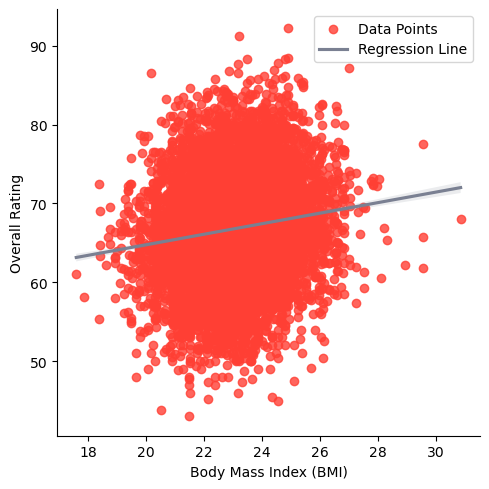

In [21]:
#  Plotting a scatter plot to show the relationship between the Body Mass Index (BMI) and the overall ratings of the players.

sns.lmplot(x="BMI", y="Overall_Rating", data=player_attributes, scatter_kws={"color": "#ff3f34"}, line_kws={"color": "#7a8092"})
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Overall Rating")
plt.legend(["Data Points", "Regression Line"])
plt.show()

6. Who were the top ten players with the highest performance scores (overall ratings) across all seasons and leagues during the entire duration?



            It may be valuable to find the players that had the highest performance scores (overall ratings) across all seasons and leagues during the entire duration to further analyse the correlation between the player attributes and how they influenced the performance scores. For this reason, I've visualised the top ten players with the highest performance scores (overall ratings) across all seasons and leagues during the entire duration as a bar chart.

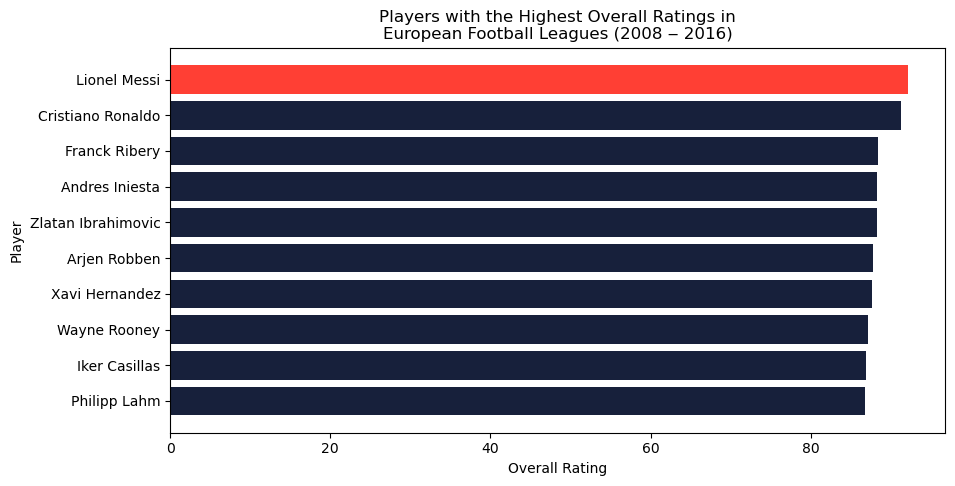

In [22]:
player_attributes=player_attributes.sort_values(by="Overall_Rating", ascending=False).reset_index(drop=True)    #   Sorting the players in descending order of their overall ratings.


#   Plotting a horizontal bar graph to show the top ten players with the highest overall ratings.

plt.figure(figsize=(10, 5))
plt.barh(player_attributes["Player"][:10], player_attributes["Overall_Rating"][:10], color="#17203b")
plt.barh(player_attributes["Player"][0], player_attributes["Overall_Rating"][0], color="#ff3f34")
plt.title('''Players with the Highest Overall Ratings in
European Football Leagues (2008 ‒ 2016)''')
plt.xlabel("Overall Rating")
plt.ylabel("Player")
plt.gca().invert_yaxis()
plt.show()

It's worth noting that there's also another performance measure for players in the database, potential, which refers to the upward ceiling of particular player and indicates how high they can reach in the attributes. Hence, it could also be useful to find the players that had the highest potential across all seasons and leagues during the entire duration to find some relation between both performance measures.

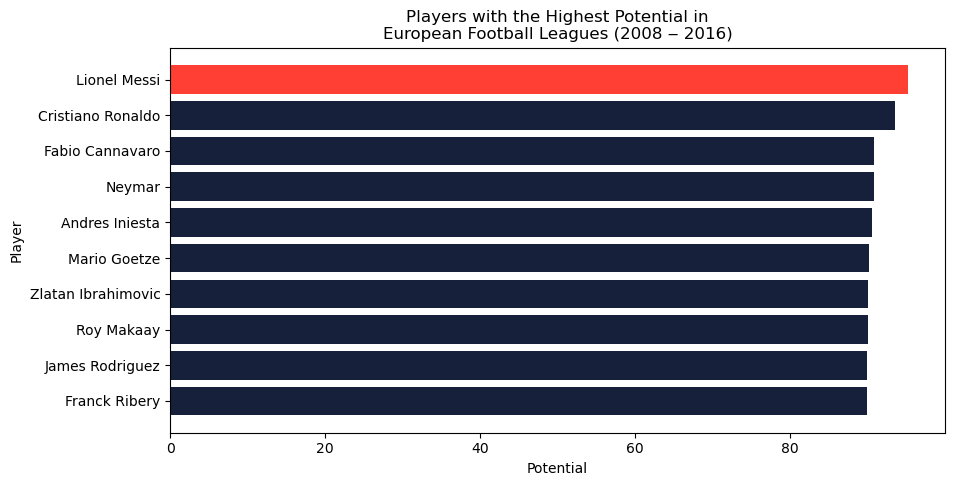

In [23]:
player_attributes=player_attributes.sort_values(by="Potential", ascending=False).reset_index(drop=True)    #   Sorting the players in descending order of their overall ratings.


#   Plotting a horizontal bar graph to show the top ten players with the highest overall ratings.

plt.figure(figsize=(10, 5))
plt.barh(player_attributes["Player"][:10], player_attributes["Potential"][:10], color="#17203b")
plt.barh(player_attributes["Player"][0], player_attributes["Potential"][0], color="#ff3f34")
plt.title('''Players with the Highest Potential in
European Football Leagues (2008 ‒ 2016)''')
plt.xlabel("Potential")
plt.ylabel("Player")
plt.gca().invert_yaxis()
plt.show()

As it stands, Lionel Messi and Cristiano Ronaldo had both the highest overall rating and potential consistently across all seasons and leagues during the entire duration. Further analyses on these two players could help find a correlation between their attributes and the ones of other players, and possibly explain why theirs excel the most.

7. How do the player attributes of the consistently highest-rated players compare to the average player attributes?


            It would be valuable to compare the player attributes of the two highest-rated players in terms of both the overall rating and potential to see how they vary from the average player attributes. Since both Lionel Messi and Cristiano Ronaldo are forwards (outfield positions), there will likely be similarities between both their attributes. However, what's I'm interested in is finding how their player attributes compare to the average player attributes, and exactly what sets these two players apart from the rest.

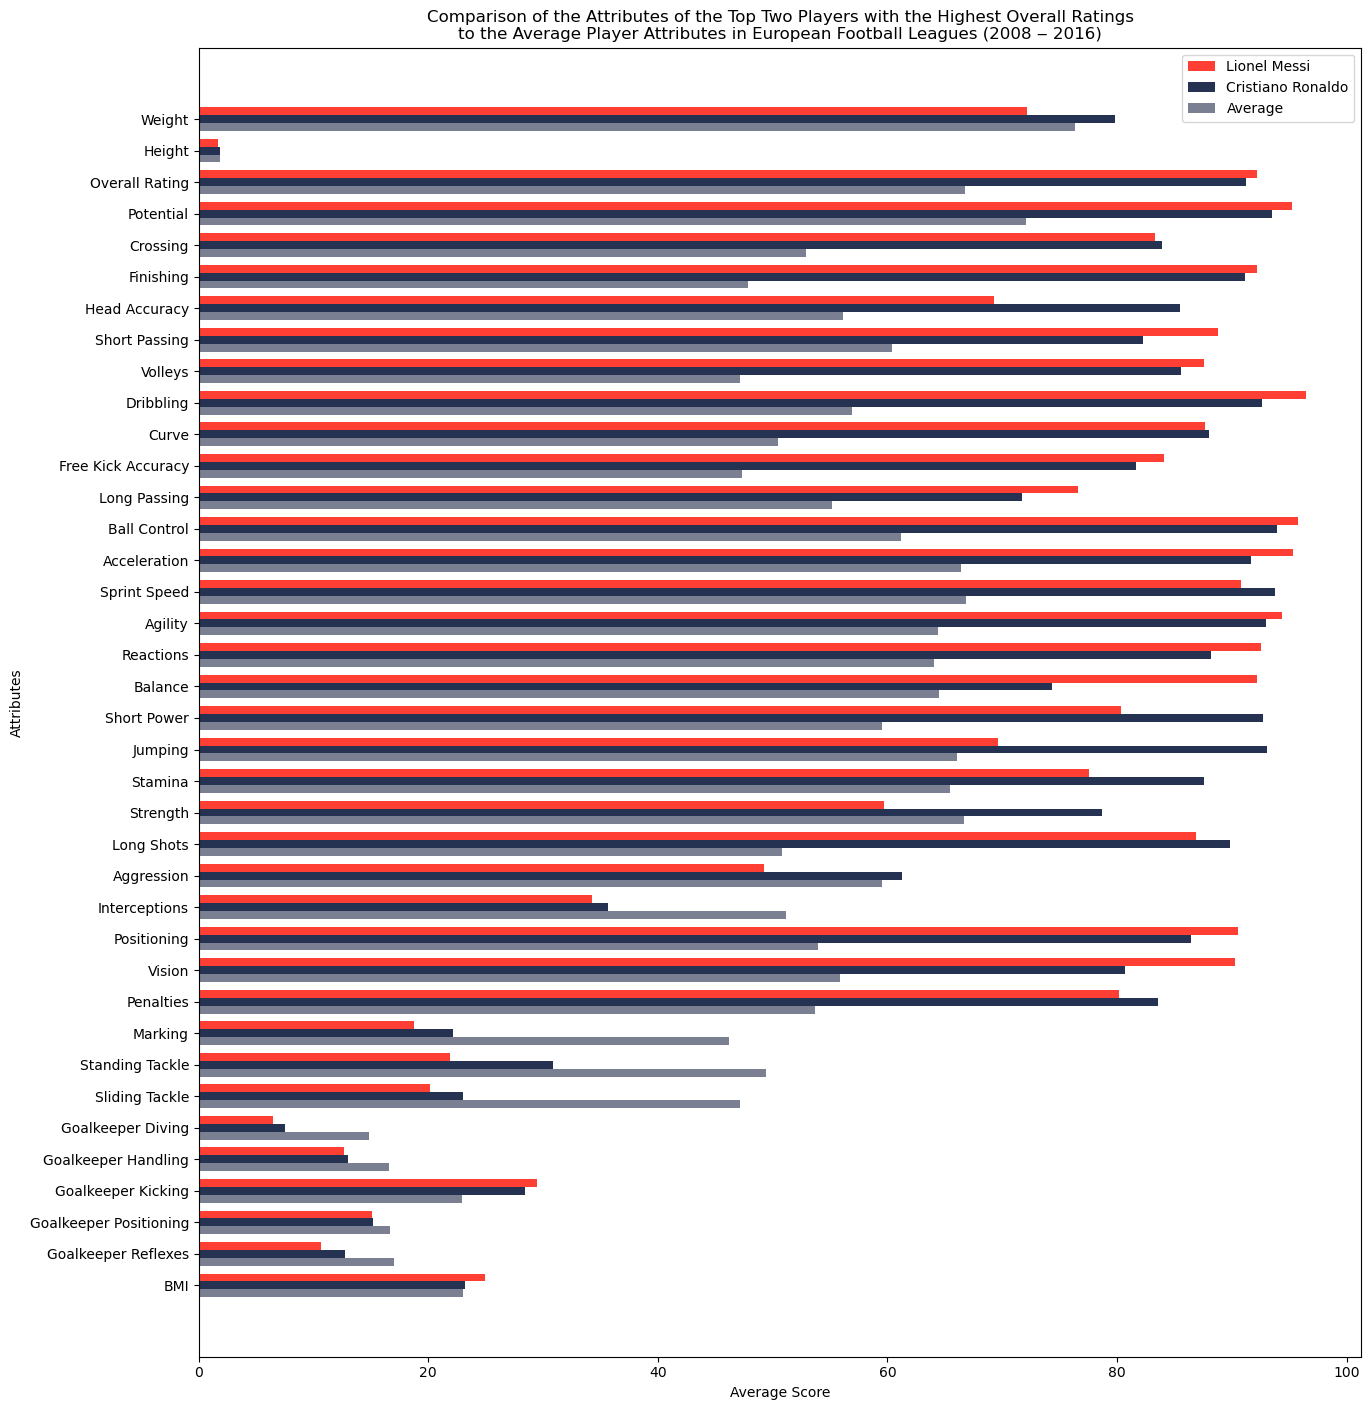

In [24]:
# Assuming you have a DataFrame named player_attributes containing player attributes
top_players = player_attributes["Player"][:2].tolist()

# Filtering the DataFrame to include only the top two players with the highest overall ratings
top_player_attributes = player_attributes[player_attributes["Player"].isin(top_players)]
top_player_attributes = top_player_attributes.set_index("Player").transpose().reset_index()
top_player_attributes = top_player_attributes.rename(columns={"index": "Attributes"})
top_player_attributes["Attributes"] = top_player_attributes["Attributes"].apply(lambda x: x.replace("_", " "))

# Calculating the average of numeric attributes for all players
average_attributes = player_attributes.drop(columns=["Player"]).mean().reset_index()
average_attributes.columns = ["Attributes", "Average"]

# Plotting a horizontal bar graph
figure = plt.figure(figsize=(15, 17))
axis = figure.add_subplot()

# Define the width of bars
width = 0.25

# Plotting bars for top players
plt.barh(np.arange(len(top_player_attributes["Attributes"])) - width, top_player_attributes[top_players[0]], color="#ff3f34", height=0.25, label=top_players[0])
plt.barh(np.arange(len(top_player_attributes["Attributes"])), top_player_attributes[top_players[1]], color="#263252", height=0.25, label=top_players[1])

# Plotting bars for average attributes
plt.barh(np.arange(len(average_attributes["Attributes"])) + width, average_attributes["Average"], color="#7a8092", height=0.25, label="Average")

# Set y-ticks and labels
axis.set_yticks(np.arange(len(top_player_attributes["Attributes"])))
axis.set_yticklabels(top_player_attributes["Attributes"])

plt.title('''Comparison of the Attributes of the Top Two Players with the Highest Overall Ratings
to the Average Player Attributes in European Football Leagues (2008 ‒ 2016)''')
plt.xlabel("Average Score")
plt.ylabel("Attributes")
plt.gca().invert_yaxis()
plt.legend()
plt.show()


8. Which player attributes set the consistently highest-rated player apart from the average player attributes, and by how much?


        From the analyses, it's clear that Lionel Messi generally excelled across all fronts. However, of course, not all the attributes that the player was assessed for dominated in his ranking. Hence, it'd only make sense to analyse the ones that consistenly made him the highest-rated player, and how they vary from the average player attributes.

        For this, however, the information would first need to be organised according to the performance score assigned to the player for each attribute, which I've done by sorting the pandas.DataFrame in descending order of the performance scores for each player attribute of Lionel Messi. Additionally, there's also no need to assess the defensive attributes, as they will cause unnecessary variation, so I've removed those attributes entirely. In this analysis, I've only used the first sixteen highest-rated attributes of the player, since some of them are redundant.

In [25]:
messi_attributes=top_player_attributes.drop(["Cristiano Ronaldo"], axis=1)  #   Creating a new pandas.DataFrame to store the attributes of the specific player.
messi_attributes=messi_attributes.sort_values(by="Lionel Messi", ascending=False).reset_index(drop=True)    #   Sorting the specific player attributes in descending order.
messi_attributes=messi_attributes.iloc[:-18, : ]    #   Dropping the last few rows, as they are either unnecessary or redundant.
messi_attributes

Player,Attributes,Lionel Messi
0,Dribbling,96.461538
1,Ball Control,95.769231
2,Acceleration,95.307692
3,Potential,95.230769
4,Agility,94.384615
5,Reactions,92.538462
6,Balance,92.230769
7,Finishing,92.230769
8,Overall Rating,92.192308
9,Sprint Speed,90.846154


Since the highest-rated attributes of the player are being compared against the average player attributes, the average player attributes also need to organised the same way.

In [26]:
average_attributes["Attributes"]=average_attributes["Attributes"].apply(lambda x: x.replace("_", " "))  #   Replacing the underscores in the column values with spaces.
messi_attributes=messi_attributes.merge(average_attributes, on="Attributes")    #   Merging both the pandas.DataFrames into one.
messi_attributes

,Attributes,Lionel Messi,Average
0,Dribbling,96.461538,56.922923
1,Ball Control,95.769231,61.174821
2,Acceleration,95.307692,66.414245
3,Potential,95.230769,72.080306
4,Agility,94.384615,64.425084
5,Reactions,92.538462,64.048981
6,Balance,92.230769,64.494772
7,Finishing,92.230769,47.880555
8,Overall Rating,92.192308,66.797845
9,Sprint Speed,90.846154,66.806224


Based on the highest-rated attributes for the consistently highest-rated player, Lionel Messi, compared against the average player attributes, the performance scores for the average player attributes are nearly half that of the performance scores for the highest-rated attributes of Lionel Messi. However, this variation can be analysed even better with a visualisation, which I've done through a polar chart.

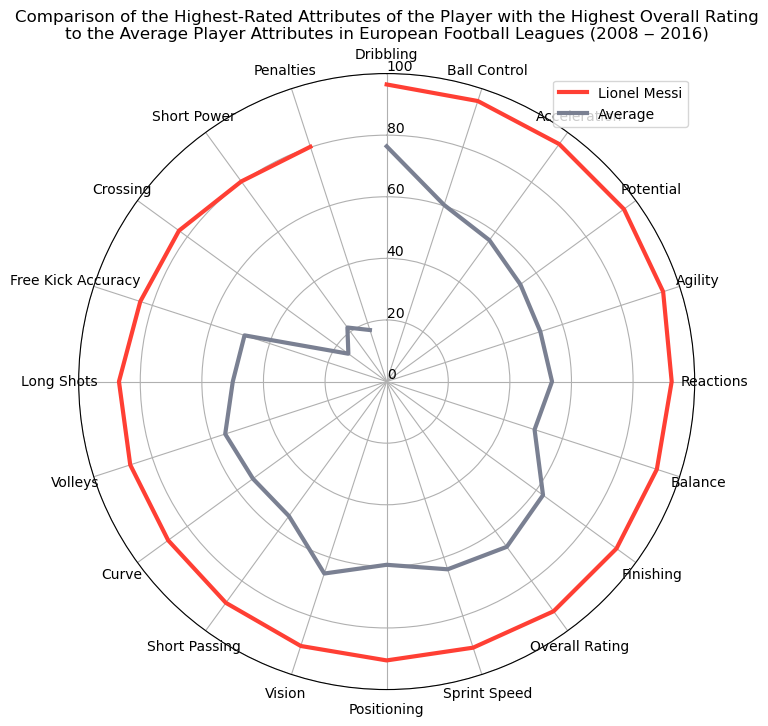

In [27]:
# Assuming you have DataFrames named messi_attributes and average_attributes
# Replace messi_attributes and average_attributes with your actual DataFrames

figure = plt.figure(figsize=(8, 8))
axis = figure.add_subplot(projection="polar")
axis.set_theta_zero_location("N")
axis.set_theta_direction(-1)
axis.set_rlabel_position(0)
axis.set_yticks([0, 20, 40, 60, 80, 100])
axis.set_yticklabels(["0", "20", "40", "60", "80", "100"])
axis.set_ylim(0, 100)

# Adjust the number of tick positions to match the number of labels
num_labels = len(messi_attributes["Attributes"])
axis.set_xticks(np.linspace(0, 2 * np.pi, num=num_labels, endpoint=False))
axis.set_xticklabels(messi_attributes["Attributes"], rotation=90)

# Interpolating average attribute values to match the number of Messi's attributes
average_values_interp = np.interp(np.linspace(0, 2 * np.pi, num=num_labels, endpoint=False), np.linspace(0, 2 * np.pi, num=len(average_attributes["Average"]), endpoint=False), average_attributes["Average"])

# Plotting attributes for Messi and interpolated average
axis.plot(np.linspace(0, 2 * np.pi, num=num_labels, endpoint=False), messi_attributes.iloc[:, 1], color="#ff3f34", label="Lionel Messi", linewidth=3)
axis.plot(np.linspace(0, 2 * np.pi, num=num_labels, endpoint=False), average_values_interp, color="#7a8092", label="Average", linewidth=3)

plt.title('''Comparison of the Highest-Rated Attributes of the Player with the Highest Overall Rating
to the Average Player Attributes in European Football Leagues (2008 ‒ 2016)''')
plt.legend()
plt.show()


As can be seen in the visualised chart, the variation between the highest-rated attributes for the consistently highest-rated player against the average player attributes is almost half, except for one player attribute where the average player attribures slightly excel, sprint speed, which is interesting because Lionel Messi was rated with a performance score of nearly 91% for sprint speed and the average sprint speed coming close to it indicates that the highest-rated attribute in most football players across leagues in Europe was their sprint speed.

In [28]:
connection.close()  #   Closing the connection to the database.